In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
stud = pd.read_csv("data2.csv")
stud

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [2]:
stud.isnull().sum()

gender                   0
math score               1
reading score            0
writing score            1
Placement Score          1
placement offer count    0
Region                   1
dtype: int64

In [3]:
(stud['writing score'].mean())


77.0

In [4]:
stud['writing score']= stud['writing score'].fillna(stud['writing score'].mean())
stud

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,77.0,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [5]:
stud['Placement Score']= stud['Placement Score'].fillna(stud['Placement Score'].mean())
stud

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.000,1,Pune
1,female,69,90,88.0,62.125,2,na
2,female,90,95,93.0,74.000,2,Nashik
3,male,47,57,77.0,78.000,1,Na
4,male,na,78,75.0,81.000,3,Pune
5,female,71,Na,78.0,70.000,4,na
6,male,12,44,52.0,12.000,2,Nashik
7,male,NaN,65,67.0,49.000,1,Pune
8,male,5,77,89.0,55.000,0,NaN


In [6]:
stud['Region']=stud['Region'].replace('na','nashik')
stud['Region']=stud['Region'].replace('Na','pune')
stud['Region']=stud['Region'].replace(np.nan,'pune')
stud

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.000,1,Pune
1,female,69,90,88.0,62.125,2,nashik
2,female,90,95,93.0,74.000,2,Nashik
3,male,47,57,77.0,78.000,1,pune
4,male,na,78,75.0,81.000,3,Pune
5,female,71,Na,78.0,70.000,4,nashik
6,male,12,44,52.0,12.000,2,Nashik
7,male,NaN,65,67.0,49.000,1,Pune
8,male,5,77,89.0,55.000,0,pune


In [7]:
le =LabelEncoder()
stud['gender'] = le.fit_transform(stud['gender'])

In [8]:
newstud = stud
newstud

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,0,72,72,74.0,78.000,1,Pune
1,0,69,90,88.0,62.125,2,nashik
2,0,90,95,93.0,74.000,2,Nashik
3,1,47,57,77.0,78.000,1,pune
4,1,na,78,75.0,81.000,3,Pune
5,0,71,Na,78.0,70.000,4,nashik
6,1,12,44,52.0,12.000,2,Nashik
7,1,NaN,65,67.0,49.000,1,Pune
8,1,5,77,89.0,55.000,0,pune


# **OUTLIERS**

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('data22.csv')

In [11]:
df.isnull().sum()

math score               0
reading score            0
writing score            0
placement score          0
placement offer count    0
club join year           0
dtype: int64

In [12]:
columns =['math score' ,'reading score','writing score','placement score']

<Axes: >

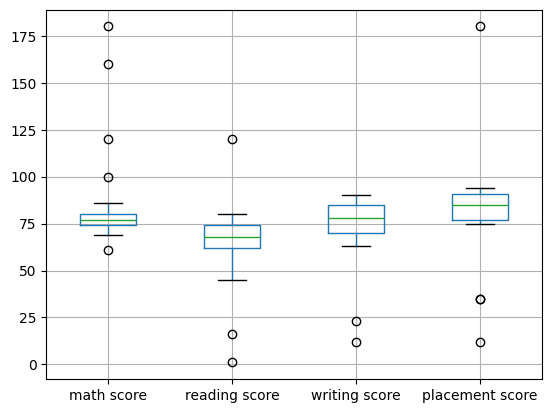

In [13]:
df.boxplot(columns)

In [14]:
print(np.where(df['math score']>90))
print(np.where(df['reading score']<25))
print(np.where(df['writing score']<30))

(array([10, 21, 25, 28], dtype=int64),)
(array([ 2, 14], dtype=int64),)
(array([10, 17], dtype=int64),)


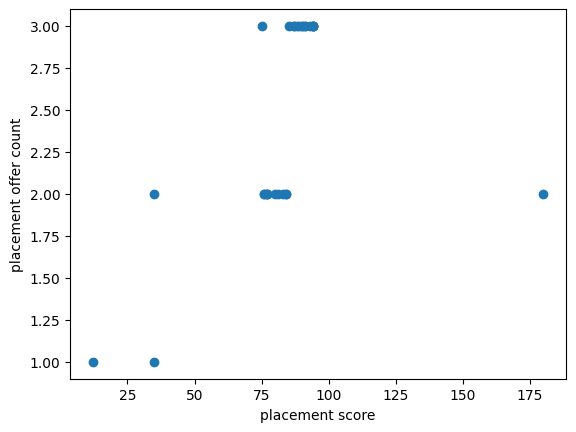

In [15]:
fig ,ax = plt.subplots()
ax.scatter(df['placement score'], df['placement offer count'])
ax.set_xlabel('placement score')
ax.set_ylabel('placement offer count')

plt.show()

In [16]:
from scipy import stats
z = np.abs(stats.zscore(df['math score']))
threshold = 0.20
sample_outliers = np.where(z <threshold)
sample_outliers

(array([ 0, 12, 16, 17, 19], dtype=int64),)

In [17]:
sorted_rscore= sorted(df['reading score'])
sorted_rscore

[1,
 16,
 45,
 60,
 60,
 61,
 62,
 62,
 62,
 65,
 65,
 65,
 67,
 67,
 68,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 77,
 77,
 77,
 78,
 79,
 80,
 120]

In [18]:
q1 = np.percentile(sorted_rscore, 25)

In [19]:
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

62.0 74.0


In [20]:
IQR = q3-q1

In [21]:
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

44.0 92.0


In [22]:
r_outliers = []
for i in sorted_rscore:
  if (i<lwr_bound or i>upr_bound):
    r_outliers.append(i)
print(r_outliers)

[1, 16, 120]
